In [139]:
# load the pandas + numpy libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series,DataFrame
# load the Series and DataFrame functions 


Data1 :we creat a data that shows each subject score per student and put it on Github. Now we read it in jupyter notebook and analysis.

In [140]:
# read csv from github 
Score = pd.read_csv('https://raw.githubusercontent.com/Yunxng/DAV.5400/master/Score.csv')

Score

,Student,Physics,Chemistry,English,Math
0,John,78,79,56,95
1,Alice,58,72,91,81
2,Rachel,22,61,88,64
3,Tom,78,89,56,83


In [141]:
#Seek everyone's total achievement
Score['Score'] = Score.apply(lambda x: x['Physics'] +  x['Chemistry'] 
                            +x['English']+x['Math'], axis=1) 
#Seeking the Average Achievement of Everyone
Score['Average Score']=Score['Score']/4
#Calculate the average score of each subject
Score.loc[4]= Score.mean()
Score.iloc[4,0]='Total Average'
Score

,Student,Physics,Chemistry,English,Math,Score,Average Score
0,John,78.0,79.00,56.00,95.00,308.00,77.0000
1,Alice,58.0,72.00,91.00,81.00,302.00,75.5000
2,Rachel,22.0,61.00,88.00,64.00,235.00,58.7500
3,Tom,78.0,89.00,56.00,83.00,306.00,76.5000
4,Total Average,59.0,75.25,72.75,80.75,287.75,71.9375


In [142]:
#Search for the highest and lowest scores in all subjects
Score.loc[5] = Score.apply(lambda x: x.max())
Score.loc[6] = Score.apply(lambda x: x.min())
Score.iloc[5,0]='Total MAX'
Score.iloc[6,0]='Total MIN'
Score

,Student,Physics,Chemistry,English,Math,Score,Average Score
0,John,78.0,79.00,56.00,95.00,308.00,77.0000
1,Alice,58.0,72.00,91.00,81.00,302.00,75.5000
2,Rachel,22.0,61.00,88.00,64.00,235.00,58.7500
3,Tom,78.0,89.00,56.00,83.00,306.00,76.5000
4,Total Average,59.0,75.25,72.75,80.75,287.75,71.9375
5,Total MAX,78.0,89.00,91.00,95.00,308.00,77.0000
6,Total MIN,22.0,61.00,56.00,64.00,235.00,58.7500


In [174]:
## change the dataset from wide format to long format by setting the "Student" as id variable
long_score=pd.melt(Score, id_vars=["Student"], value_vars=['Physics','Chemistry',
                                                           'English','Math','Average Score'])
# rename column for variable and value
long_score.rename(columns={'variable':'Subject', 'value':'Score'}, inplace = True)
# create a pivot table by mimic the origianl format
long_score.pivot_table(index=['Student','Subject']).head(10)

Score
Student Subject             
Alice   Average Score   75.5
        Chemistry       72.0
        English         91.0
        Math            81.0
        Physics         58.0
John    Average Score   77.0
        Chemistry       79.0
        English         56.0
        Math            95.0
        Physics         78.0

From the above analysis, we can conclude that the highest scores of each subject are 78, 89, 91 and 95. The lowest scores of each subject are 22, 61, 56 and 64, respectively.The highest average and total scores were John and the lowest was Rachel.

Data2:A small dataset containing test grades for students in a math class. 

In [191]:
# read csv from github 
Test = pd.read_csv('https://raw.githubusercontent.com/Yunxng/DAV.5400/master/Test.csv')
#define the NaN's value as 0
Test=Test.fillna(0)
Test

,Name,Test1,Test2,Test3,Test4
0,Reggie Miller,97.0,80,87.0,91
1,Dan Bonner,76.0,68,80.0,81
2,Steve Smith,84.0,75,0.0,86
3,Charles Barkey,0.0,89,0.0,76
4,Kenny Smith,80.0,81,79.0,85
5,Chris Webber,75.0,75,76.0,92
6,Jalen Rose,80.0,85,84.0,83
7,Jim Jackson,92.0,91,94.0,95


In [192]:
#Find the range of each student.
Test['range']=Test.max(axis=1)-Test.min(axis=1)
#Seeking the Average Achievement of Everyone
Test['Average Score'] = Test.apply(lambda x: x['Test1'] +  x['Test2'] 
                            +x['Test3']+x['Test4'], axis=1)/4

Test.sort_values(by='Average Score')

,Name,Test1,Test2,Test3,Test4,range,Average Score
3,Charles Barkey,0.0,89,0.0,76,89.0,41.25
2,Steve Smith,84.0,75,0.0,86,86.0,61.25
1,Dan Bonner,76.0,68,80.0,81,13.0,76.25
5,Chris Webber,75.0,75,76.0,92,17.0,79.50
4,Kenny Smith,80.0,81,79.0,85,6.0,81.25
6,Jalen Rose,80.0,85,84.0,83,5.0,83.00
0,Reggie Miller,97.0,80,87.0,91,17.0,88.75
7,Jim Jackson,92.0,91,94.0,95,4.0,93.00


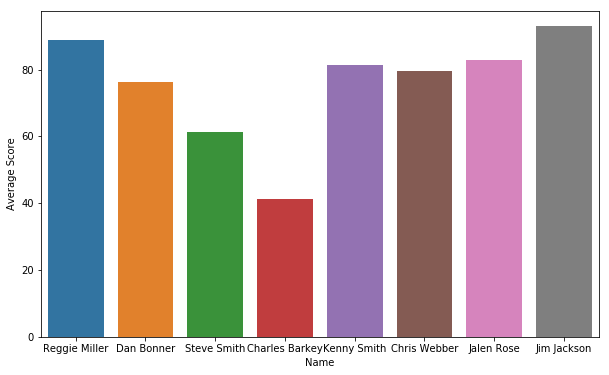

In [193]:
# create a bar chart to visualize the comparison for Average Score 
plt.figure(figsize=(10,6))
sns.barplot(x='Name', y='Average Score', data=Test)

In [194]:
#Calculate the average score of each subject
Test.loc[8]= Test.mean()
Test.iloc[8,0]='Total Average'

#Search for the highest and lowest scores in all subjects
Test.loc[9] = Test.apply(lambda x: x.max())
Test.loc[10] = Test.apply(lambda x: x.min())

Test.iloc[9,0]='Total MAX'
Test.iloc[10,0]='Total MIN'
Test

,Name,Test1,Test2,Test3,Test4,range,Average Score
0,Reggie Miller,97.0,80.0,87.0,91.000,17.000,88.75000
1,Dan Bonner,76.0,68.0,80.0,81.000,13.000,76.25000
2,Steve Smith,84.0,75.0,0.0,86.000,86.000,61.25000
3,Charles Barkey,0.0,89.0,0.0,76.000,89.000,41.25000
4,Kenny Smith,80.0,81.0,79.0,85.000,6.000,81.25000
5,Chris Webber,75.0,75.0,76.0,92.000,17.000,79.50000
6,Jalen Rose,80.0,85.0,84.0,83.000,5.000,83.00000
7,Jim Jackson,92.0,91.0,94.0,95.000,4.000,93.00000
8,Total Average,73.0,80.5,62.5,86.125,29.625,75.53125
9,Total MAX,97.0,91.0,94.0,95.000,89.000,93.00000


In [195]:
# change the dataset from wide format to long format by setting the "Name" as id variable
long_test=pd.melt(Test, id_vars=["Name"], value_vars=['Test1','Test2','Test3','Test4','Average Score'])
long_test.sort_values(by='Name').head()

,Name,variable,value
25,Charles Barkey,Test3,0.00
36,Charles Barkey,Test4,76.00
3,Charles Barkey,Test1,0.00
14,Charles Barkey,Test2,89.00
47,Charles Barkey,Average Score,41.25


From the above analysis,Jim Jackson had the highest average test grades;test1 had the highest grades;Charles Barkey had the greatest range of test grades

Data3: Data for different institutions in the academic year of 2016/2017

In [196]:
# read csv from github 
enroll=pd.read_csv('https://raw.githubusercontent.com/Yunxng/DAV.5400/master/W9%20untidy%20data-1.csv')
enroll


,Unique ID of the institution,Level of student,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,White,Two or more races,Race/ethnicity unknown,Nonresident alien
0,100654,Undergraduate,11,12,4742,36,10,137,210,11,38
1,100654,Graduate,4,11,961,7,1,151,14,3,33
2,100663,Undergraduate,36,743,3497,429,4,7515,522,198,364
3,100663,Graduate,26,471,1550,289,11,6437,269,176,659
4,100690,Undergraduate,0,2,195,44,1,66,0,123,0
5,100690,Graduate,2,1,152,43,4,93,0,142,0
6,100706,Undergraduate,90,304,813,313,3,5055,129,595,217
7,100706,Graduate,23,71,202,64,0,1518,20,115,365


In [197]:
# change the dataset from wide format to long format by setting the "Unique ID of the institution"and'Level of student' as id variable
long_enroll=pd.melt(enroll, id_vars=["Unique ID of the institution",'Level of student'], value_vars=['American Indian or Alaska Native','Asian','Black or African American',
                                                                                                     'Hispanic or Latino','Native Hawaiian or Other Pacific Islander',  
                                                                                                     'White','Two or more races','Race/ethnicity unknown','Nonresident alien'])
long_enroll.rename(columns={'variable':'ethnicity','value':'Number of each ethnicity'},inplace=True)
long_enroll.head()

,Unique ID of the institution,Level of student,ethnicity,Number of each ethnicity
0,100654,Undergraduate,American Indian or Alaska Native,11
1,100654,Graduate,American Indian or Alaska Native,4
2,100663,Undergraduate,American Indian or Alaska Native,36
3,100663,Graduate,American Indian or Alaska Native,26
4,100690,Undergraduate,American Indian or Alaska Native,0


In [198]:
# create a pivot table by mimic the origianl format
long_enroll.pivot_table(index=["Unique ID of the institution",'Level of student','ethnicity']).head(10)

Number of each ethnicity
Unique ID of the institution Level of student ethnicity                                                          
100654                       Graduate         American Indian or Alaska Native                                  4
                                              Asian                                                            11
                                              Black or African American                                       961
                                              Hispanic or Latino                                                7
                                              Native Hawaiian or Other Pacific Islander                         1
                                              Nonresident alien                                                33
                                              Race/ethnicity unknown                                            3
                                              Two or more races                                                14
                                              White                                                           151
                             Undergraduate    American Indian or Alaska Native                                 11

In [199]:
# create a frame to contain the total number of each ethnicity
df = long_enroll.groupby(['ethnicity']).sum()['Number of each ethnicity'].to_frame()

df


,Number of each ethnicity
ethnicity,
American Indian or Alaska Native,192
Asian,1615
Black or African American,12112
Hispanic or Latino,1225
Native Hawaiian or Other Pacific Islander,34
Nonresident alien,1676
Race/ethnicity unknown,1363
Two or more races,1164
White,20972


In [200]:
df.describe()

,Number of each ethnicity
count,9.000000
mean,4483.666667
std,7209.060601
min,34.000000
25%,1164.000000
50%,1363.000000
75%,1676.000000
max,20972.000000


In [207]:
# create a frame to contain the total number of each institution
df1=long_enroll.groupby(['Unique ID of the institution']).sum()['Number of each ethnicity'].to_frame()
df1.rename(columns={'Number of each ethnicity':'Number of each institution'},inplace=True)
df1

,Number of each institution
Unique ID of the institution,
100654,6392
100663,23196
100690,868
100706,9897


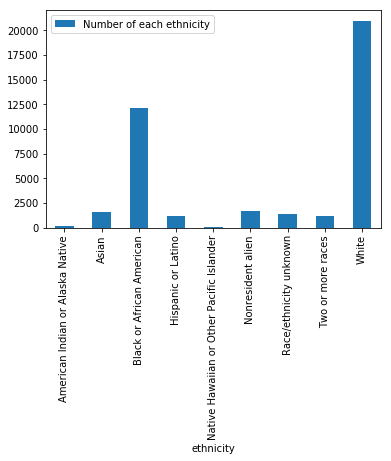

In [204]:
#Describe the number of people of each race and draw a bar chart.
df.plot(kind='bar')

From the above analysis, it can be seen that a total of nine races of students have been admitted. White people accounted for the largest number, a total of 20972 people. Native Hawaiian or Other Pacific Islander is the smallest of all races, only 34. Institution 100 663 enrolled the largest number of people, 23196